### Урок 7. Многомерный статистический анализ. Линейная регрессия

In [253]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### Задача 1

#### Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

#### и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

#### 1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.

#### 2. Является ли значимым получившееся уравнение регрессии?


In [254]:
X = pd.DataFrame([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], 
     [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], 
     [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], 
     [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], 
     [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = pd.DataFrame([9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 
     14.29010746, 6.68361218])

In [255]:
print (X)

          0         1         2         3
0  1.224013  2.308685  3.036364  2.692872
1 -0.187573  1.303374  5.120930  3.463632
2 -0.810945  1.824634  5.796865  1.861594
3  0.751290  2.673921  3.655298  1.667461
4  0.009724  1.973673  2.505943  1.697552
5 -0.629726  0.777508  2.841240  4.544106
6  2.295362  1.812067  1.950262  1.518746
7  0.092042  2.269714  7.477087  2.610812
8  2.392528  3.175640  3.614206  5.107734
9  0.549838  2.879887  1.657528  1.596360


In [256]:
x1 = X[[0, 1]].values
x2 = X[[0, 2]].values
x3 = X[[0, 3]].values
x4 = X[[1, 2]].values
x5 = X[[1, 3]].values
x6 = X[[2, 3]].values

In [257]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [258]:
ones = np.ones((x1.shape[0], 1))
x1 = np.hstack((ones, x1))
x1

array([[ 1.        ,  1.22401313,  2.30868478],
       [ 1.        , -0.18757272,  1.30337355],
       [ 1.        , -0.81094525,  1.82463398],
       [ 1.        ,  0.75129018,  2.67392052],
       [ 1.        ,  0.00972362,  1.97367255],
       [ 1.        , -0.62972637,  0.77750764],
       [ 1.        ,  2.29536229,  1.81206697],
       [ 1.        ,  0.0920418 ,  2.26971361],
       [ 1.        ,  2.39252799,  3.17563985],
       [ 1.        ,  0.54983815,  2.87988651]])

In [259]:
XTX = x1.T.dot(x1)
np.linalg.det(XTX)

349.7782033818856

Определитель не близок к нулю, поэтому проблем с методом нет.

In [260]:
XTX_inv = np.linalg.inv(XTX)
b1 = XTX_inv.dot(x1.T).dot(y)
print(b1)

[[6.70781579]
 [0.40786841]
 [1.03360247]]


In [261]:
z1 = x1.dot(b1)

In [262]:
R1 = 1 - ((y - z1)**2).sum() / sum_of_squares(y)
R1

0    0.181136
dtype: float64

In [263]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [264]:
XTX = x2.T.dot(x2)
np.linalg.det(XTX)
XTX_inv = np.linalg.inv(XTX)
b2 = XTX_inv.dot(x2.T).dot(y)
z2 = x2.dot(b2)
R2 = 1 - ((y - z2)**2).sum() / sum_of_squares(y)
R2

0    0.763425
dtype: float64

In [265]:
ones = np.ones((x3.shape[0], 1))
x3 = np.hstack((ones, x3))

In [266]:
XTX = x3.T.dot(x3)
np.linalg.det(XTX)
XTX_inv = np.linalg.inv(XTX)
b3 = XTX_inv.dot(x3.T).dot(y)
z3 = x3.dot(b3)
R3 = 1 - ((y - z3)**2).sum() / sum_of_squares(y)
print(f'R3: {R3}')

R3: 0    0.453297
dtype: float64


In [267]:
ones = np.ones((x4.shape[0], 1))
x4 = np.hstack((ones, x4))

In [268]:
XTX = x4.T.dot(x4)
np.linalg.det(XTX)
XTX_inv = np.linalg.inv(XTX)
b4 = XTX_inv.dot(x4.T).dot(y)
z4 = x4.dot(b4)
R4 = 1 - ((y - z4)**2).sum() / sum_of_squares(y)
print(f'R4: {R4}')

R4: 0    0.547948
dtype: float64


In [269]:
ones = np.ones((x5.shape[0], 1))
x5 = np.hstack((ones, x5))

In [270]:
XTX = x5.T.dot(x5)
np.linalg.det(XTX)
XTX_inv = np.linalg.inv(XTX)
b5 = XTX_inv.dot(x5.T).dot(y)
z5 = x5.dot(b5)
R5 = 1 - ((y - z5)**2).sum() / sum_of_squares(y)
print(f'R5: {R5}')

R5: 0    0.606206
dtype: float64


In [271]:
ones = np.ones((x6.shape[0], 1))
x6 = np.hstack((ones, x6))

In [272]:
XTX = x6.T.dot(x6)
np.linalg.det(XTX)
XTX_inv = np.linalg.inv(XTX)
b6 = XTX_inv.dot(x6.T).dot(y)
z6 = x6.dot(b6)
R6 = 1 - ((y - z6)**2).sum() / sum_of_squares(y)
print(f'R6: {R6}')

R6: 0    0.622442
dtype: float64


In [273]:
print(f'R1: {R1}')
print(f'R2: {R2}')
print(f'R3: {R3}')
print(f'R4: {R4}')
print(f'R5: {R5}')
print(f'R6: {R6}')

R1: 0    0.181136
dtype: float64
R2: 0    0.763425
dtype: float64
R3: 0    0.453297
dtype: float64
R4: 0    0.547948
dtype: float64
R5: 0    0.606206
dtype: float64
R6: 0    0.622442
dtype: float64


#### Два признака с максимальным уровнем линейной зависимости целевой переменной от значений этих признаков: x2 (X[[0, 2]])

In [274]:
print(b2)

[[3.62455695]
 [1.62531203]
 [1.21134979]]


In [275]:
x2

array([[ 1.        ,  1.22401313,  3.03636353],
       [ 1.        , -0.18757272,  5.12093014],
       [ 1.        , -0.81094525,  5.79686488],
       [ 1.        ,  0.75129018,  3.65529809],
       [ 1.        ,  0.00972362,  2.50594319],
       [ 1.        , -0.62972637,  2.84124027],
       [ 1.        ,  2.29536229,  1.95026215],
       [ 1.        ,  0.0920418 ,  7.47708735],
       [ 1.        ,  2.39252799,  3.61420599],
       [ 1.        ,  0.54983815,  1.65752765]])

Модель регрессии имеет вид:$$y = 3.62455695 - 1.62531203 \cdot x_1 + 1.21134979 \cdot x_2,$$

In [283]:
n = x2.shape[0]
m = x2.shape[1] - 1  # поскольку добавляли фиктивный столбец
k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [284]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

In [285]:
F = (R2 / k1) / ((1 - R2) / k2)
F

0    11.294439
dtype: float64

#### Статистика попала в критическую область, уравнение регрессии признаётся значимым.

### Задача 2

#### Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

#### Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

#### Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
#### Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
#### Посчитайте коэффициент детерминации.
#### Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
#### (доп) Посчитать среднюю ошибку аппроксимации


In [335]:
salary = pd.DataFrame([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = pd.DataFrame([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [336]:
x1 = salary
y1 = scoring

### 1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

##### По формуле для парной регрессии:

In [337]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b0, b1

(0    444.177357
 dtype: float64,
 0    2.620539
 dtype: float64)

модель линейной регрессии имеет вид:
$$y = 444.1773573243596 + 2.620538882402765 \cdot x,$$

##### Методом наименьших квадратов:

In [338]:
ones = np.ones((x1.shape[0], 1))
x1 = np.hstack((ones, x1))

In [339]:
x1.shape

(10, 2)

In [340]:
XTX = x1.T.dot(x1)
np.linalg.det(XTX)

349464.00000000023

In [341]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x1.T).dot(y)
print(b)

[[444.17735732]
 [  2.62053888]]


#### Коэффициенты линейной регрессии совпадают

### 2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

In [342]:
x1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [347]:
x1 = x1[:,1:]

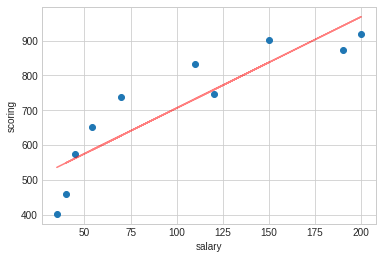

In [352]:
b0 = b[0]
b1 = b[1]
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

### 3. Посчитайте коэффициент детерминации.

In [353]:
z1 = b0 + b1 * x1
# e1 = y1 - z1 

In [354]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [357]:
R1 = 1 - ((y1 - z1)**2).sum() / sum_of_squares(y1)
R1

0    0.787639
dtype: float64

### 4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.


In [358]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [359]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

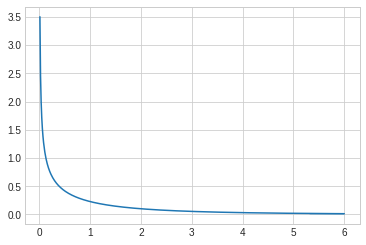

In [362]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [361]:
F = (R1 / k1) / ((1 - R1) / k2)
F

0    29.671641
dtype: float64

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

### 5. (доп) Посчитать среднюю ошибку аппроксимации

In [363]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [364]:
mean_approximation_error(y1, z1)

0    0.114693
dtype: float64

$\overline{A}$ не превышает $8-10 \%$, поэтому можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.